# Hypertension risk prediction
---
Hi there! This is **my second Kaggle project**. Welcome to **HYPERTENSION RISK PREDICTION** project. This project uses synthetic yet realistic healthcare dataset to explore the factors contributing to hypertension and build predictive machine learning models.

## Project Objectives
- Perform exploratory data analysis (EDA)
- Build binary classification models (e.g., Logistic Regression, Random Forest, XGBoost)
- Analyze feature importance
- Interpret predictions using SHAP values and feature importances.

## 📁 Dataset Information
📄 **Name:** Hypertension Risk Prediction Dataset  
🔗 **Source:** [🩺 Hypertension Risk Prediction Dataset](https://www.kaggle.com/datasets/miadul/hypertension-risk-prediction-dataset)  
👤 **Author:** [Ejtolf](https://github.com/Ejtolf)  
📝 **Task Type:** Binary Classification (Target: `Has_Hypertension` - Yes/No

## 💻 Tools & Technologies
- **Python** (Pandas, NumPy, Matplotlib, Seaborn) to code
- **Scikit-Learn** to build binary ML models (Logistic Regression, Random Forest) 
- **XGBoost** to build gradient boost model
- **SHAP** to check for features importance 
- **Jupyter Notebook** to research.

# 1. Exploratory Data Analysis

In [1]:
import os
import warnings
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [2]:
path = os.path.join('..', 'data', 'raw', 'hypertension_dataset.csv')
df = pd.read_csv(path)

display(df.head())
display(df.info())
print(f'\nShape: {df.shape[1]} records to {df.shape[0]} features.')

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


None


Shape: 11 records to 1985 features.


## 📁 Feature Overview

| 🏷️ Column Name      | 📝 Description |
|---------------------|----------------|
| `Age`               | Patient's age (in years) |
| `Salt_Intake`       | Daily salt intake (grams per day) |
| `Stress_Score`      | Psychological stress level (0–10 scale) |
| `BP_History`        | Blood pressure history: `Normal`, `Prehypertension`, `Hypertension` |
| `Sleep_Duration`    | Average daily sleep duration (in hours) |
| `BMI`               | Body Mass Index |
| `Medication`        | Medication type: `None`, `Beta Blocker`, `Diuretic`, `ACE Inhibitor`, `Other` |
| `Family_History`    | Family history of hypertension: `Yes` / `No` |
| `Exercise_Level`    | Physical activity level: `Low`, `Moderate`, `High` |
| `Smoking_Status`    | Smoking status: `Smoker` / `Non-Smoker` |
| `Has_Hypertension`  | Target variable: Presence of hypertension (`Yes` / `No`) |

In [3]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [4]:
df.columns = df.columns.str.lower()
list(df.columns)

['age',
 'salt_intake',
 'stress_score',
 'bp_history',
 'sleep_duration',
 'bmi',
 'medication',
 'family_history',
 'exercise_level',
 'smoking_status',
 'has_hypertension']

Empty cells: age                   0
salt_intake           0
stress_score          0
bp_history            0
sleep_duration        0
bmi                   0
medication          799
family_history        0
exercise_level        0
smoking_status        0
has_hypertension      0
dtype: int64


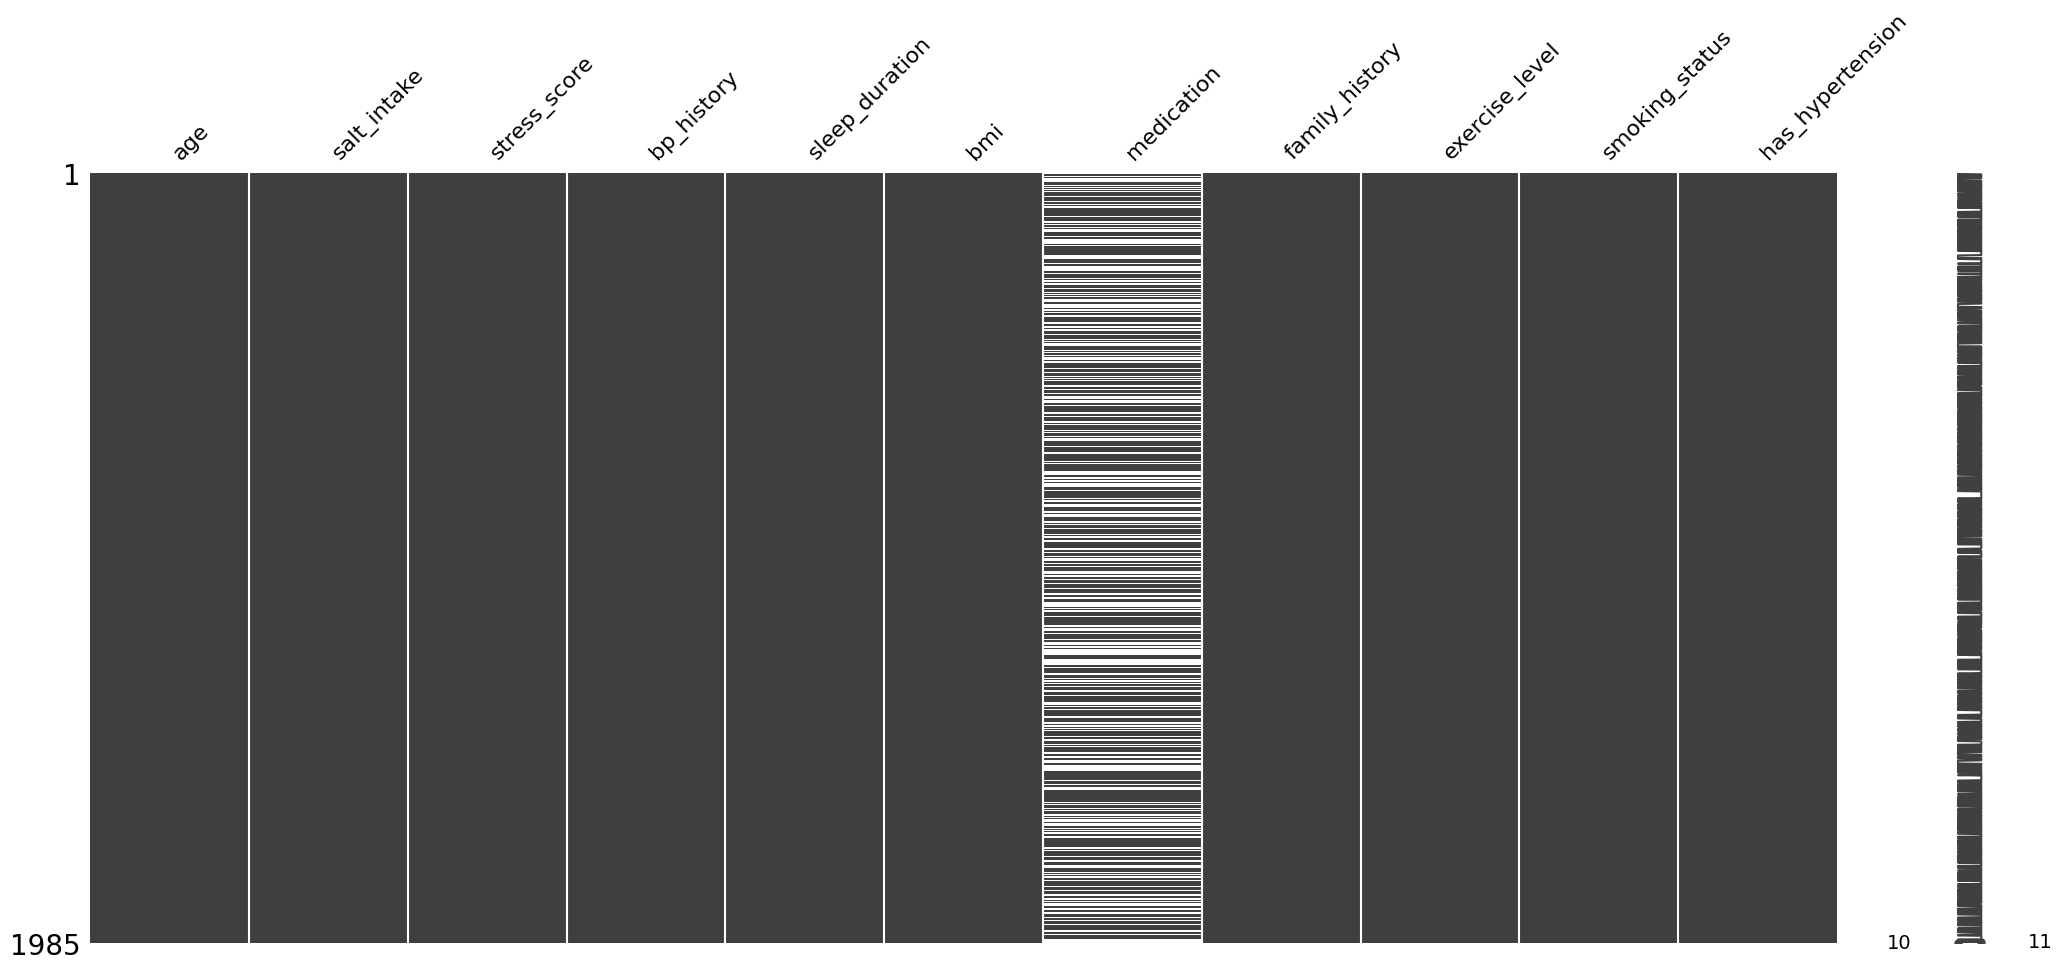

In [5]:
if df.isna().sum().values.any():
    print(f'Empty cells: {df.isna().sum()}')
    msno.matrix(df)
else:
    print('No empty values.')

In [6]:
df['medication'] = df['medication'].fillna('No data')

In [7]:
if df.duplicated().sum():
    print(f'Found {df.duplicated().sum()} duplicates.')
    df = df.drop_duplicates()
    print('Duplicates has been removed.')
else:
    print('No duplicates.')

No duplicates.


### Converting categorial features to ```category```. 

In [8]:
df.dtypes

age                   int64
salt_intake         float64
stress_score          int64
bp_history           object
sleep_duration      float64
bmi                 float64
medication           object
family_history       object
exercise_level       object
smoking_status       object
has_hypertension     object
dtype: object

In [9]:
cat_cols = ['bp_history', 'medication', 'family_history', 'exercise_level',
           'smoking_status', 'has_hypertension']

for col in cat_cols:
    df[col] = df[col].astype('category')

df.head()

,age,salt_intake,stress_score,bp_history,sleep_duration,bmi,medication,family_history,exercise_level,smoking_status,has_hypertension
0,69,8.0,9,Normal,6.4,25.8,No data,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,No data,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,No data,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [10]:
num_cols = ['age', 'salt_intake', 'stress_score', 'sleep_duration', 'bmi']

### Distribution for numeric and categorial features

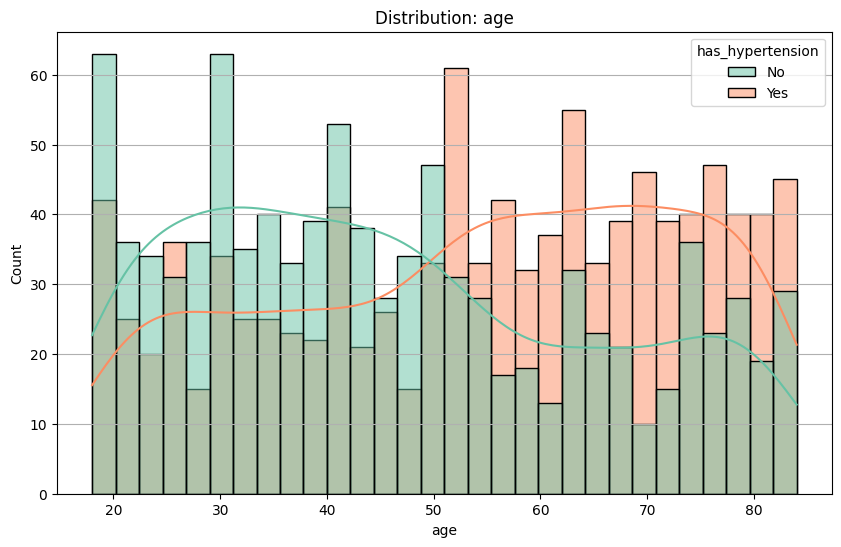

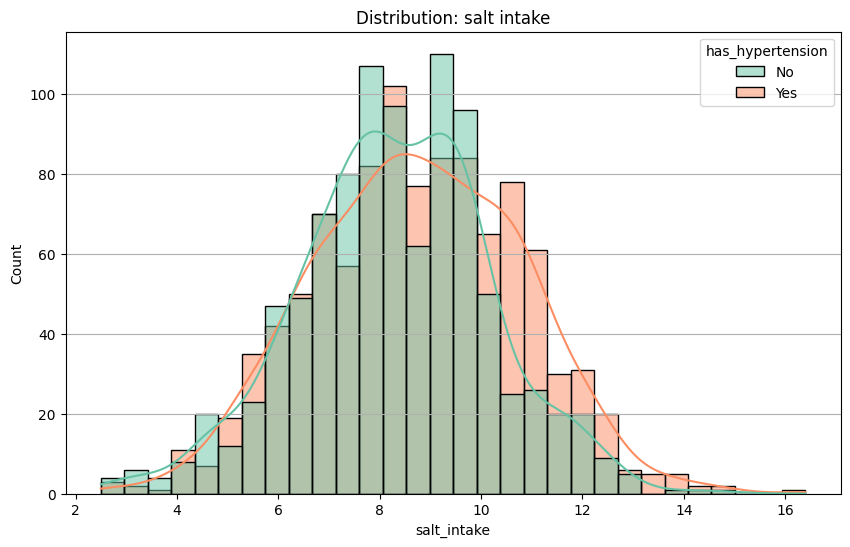

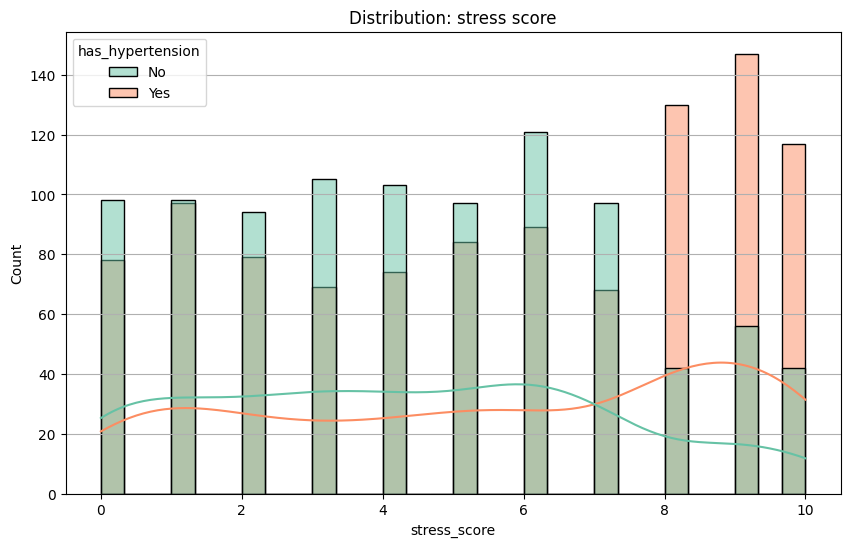

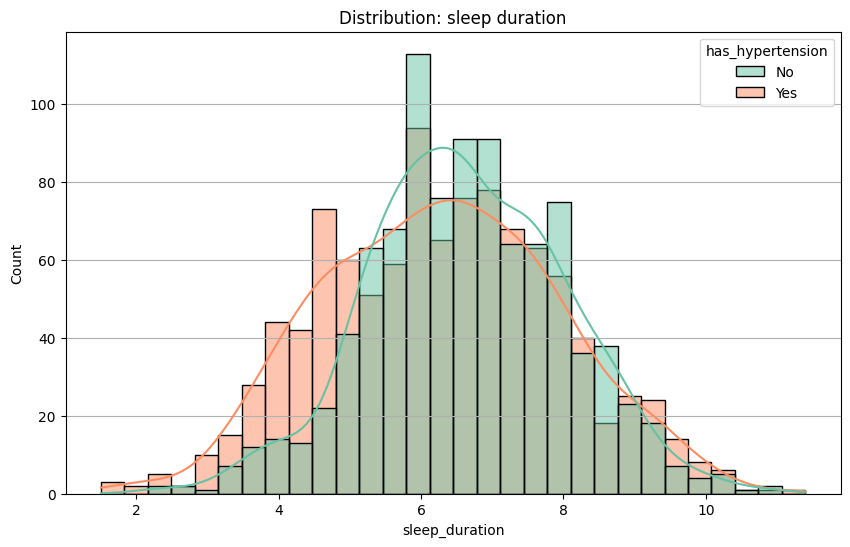

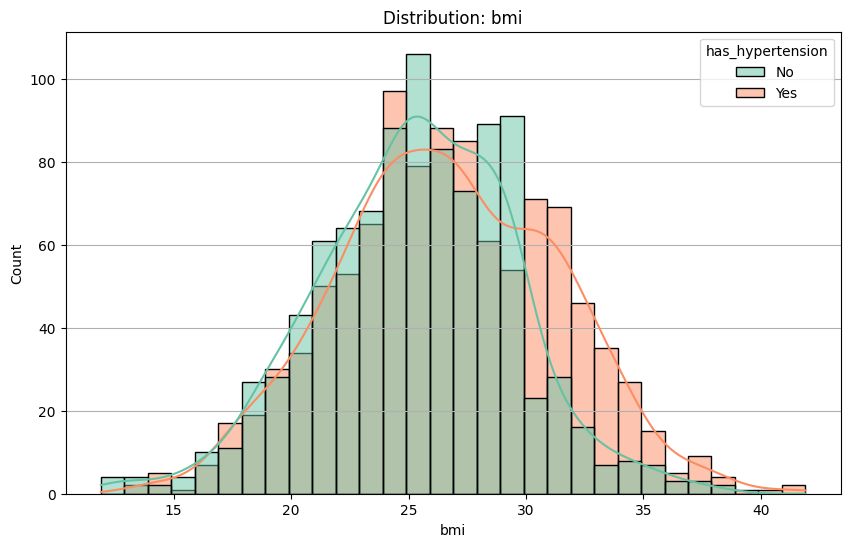

In [11]:
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True, 
                 hue='has_hypertension', palette='Set2',
                bins=30)
    plt.title(f'Distribution: {col.replace('_', ' ')}')
    plt.grid(axis='y')
    plt.show()

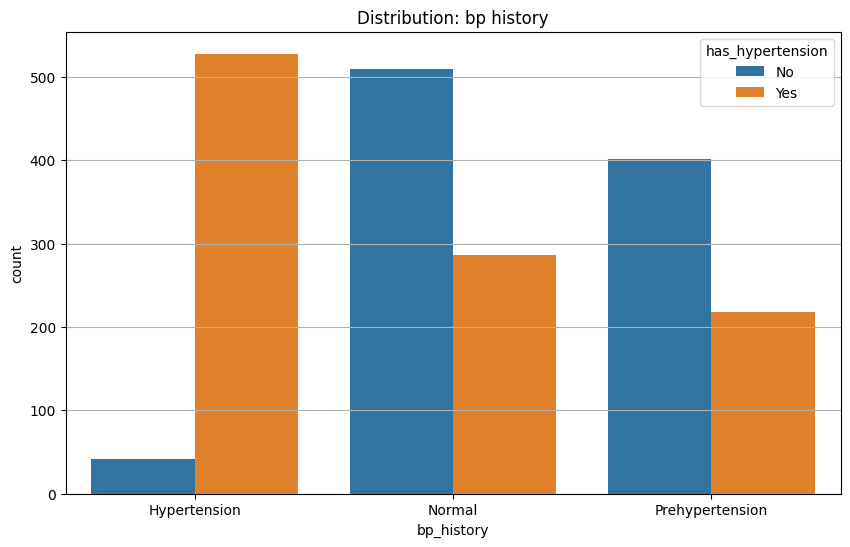

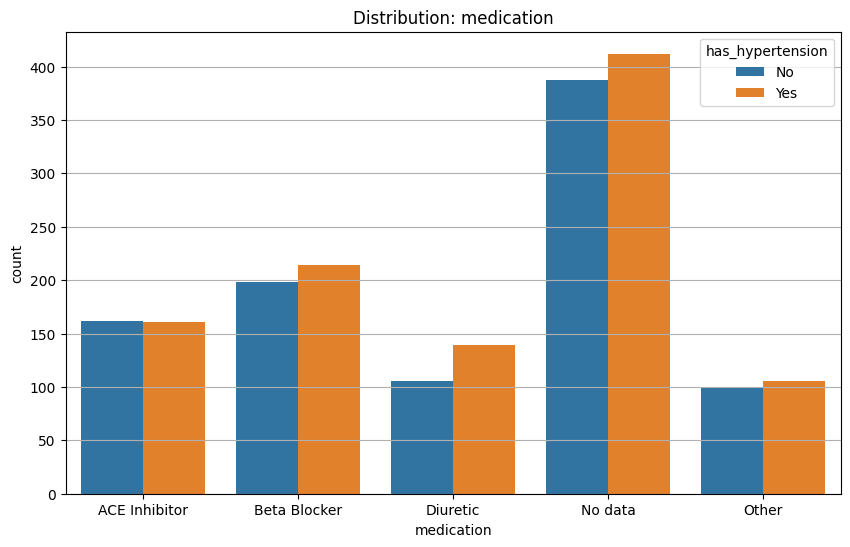

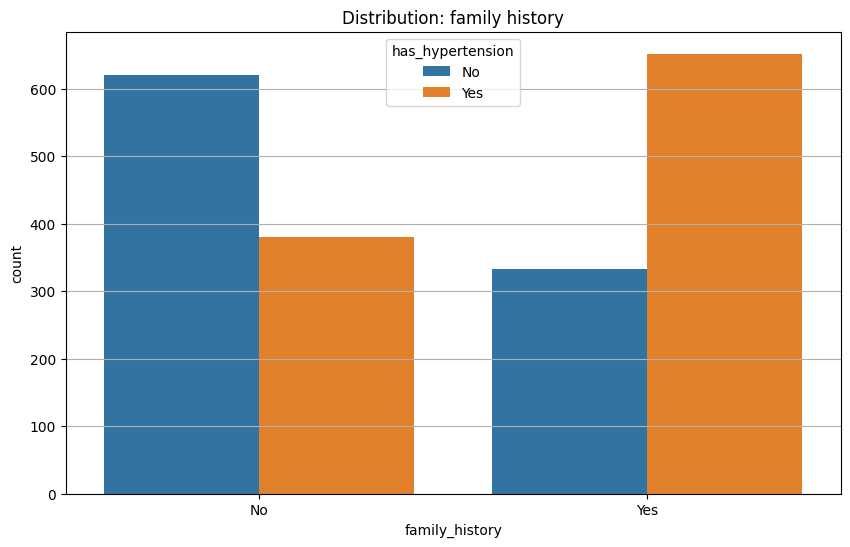

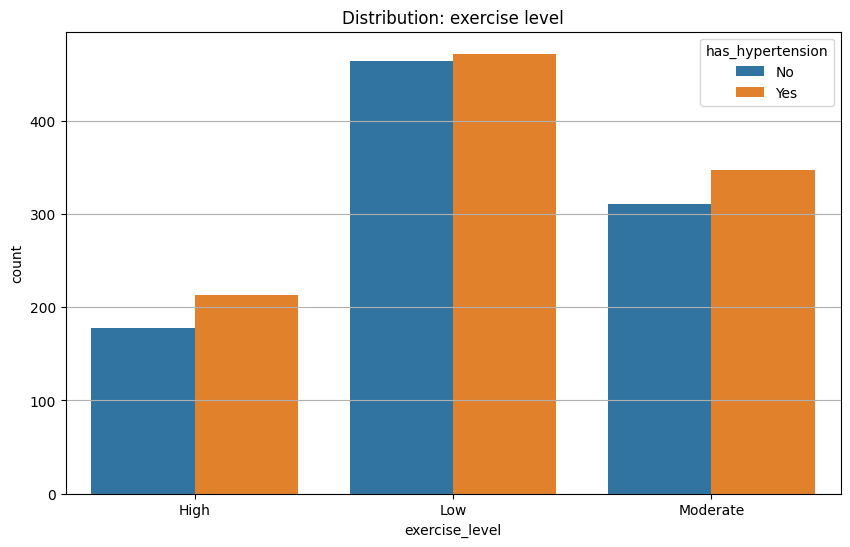

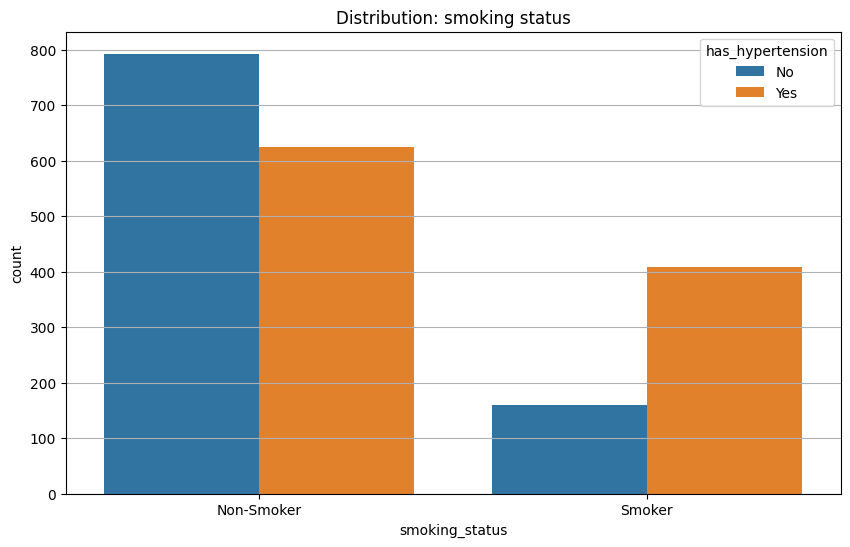

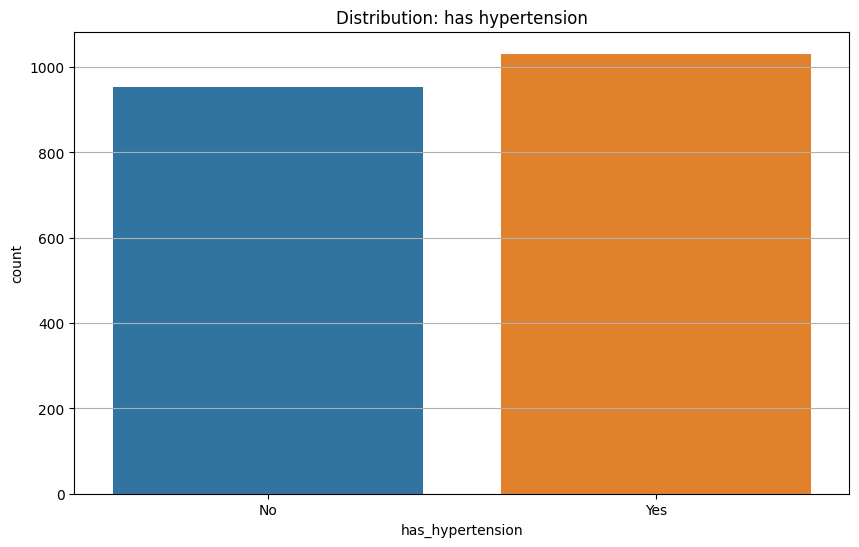

In [12]:
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue='has_hypertension')
    plt.title(f'Distribution: {col.replace('_', ' ')}')
    plt.grid(axis='y')
    plt.show()

Text(0.5, 1.0, 'Pearson correlation matrix (for numeric features)')

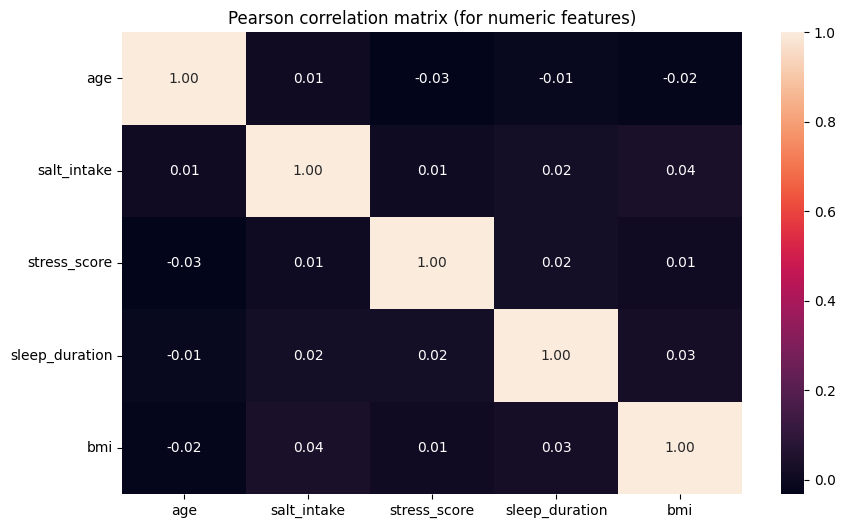

In [13]:
df_corr = df[num_cols].corr(method='pearson')
sns.heatmap(df_corr, annot=True, cmap='rocket', fmt='.2f')
plt.title('Pearson correlation matrix (for numeric features)')

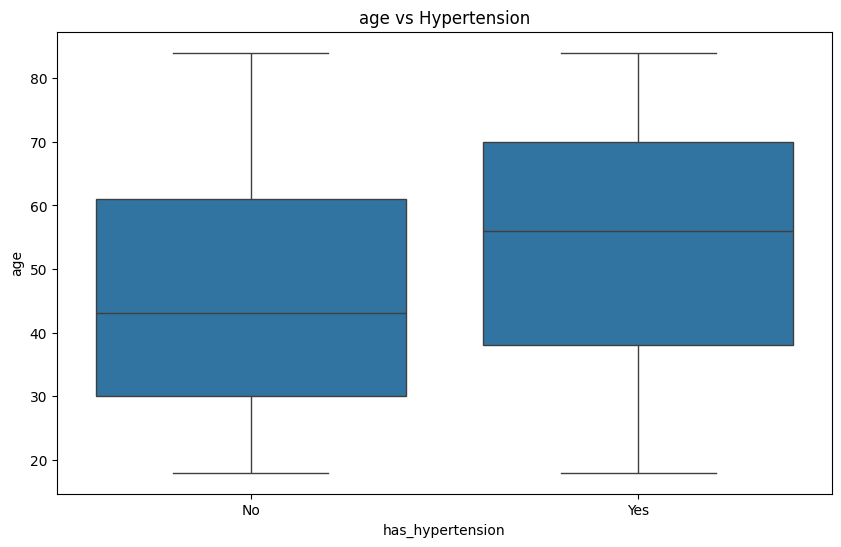

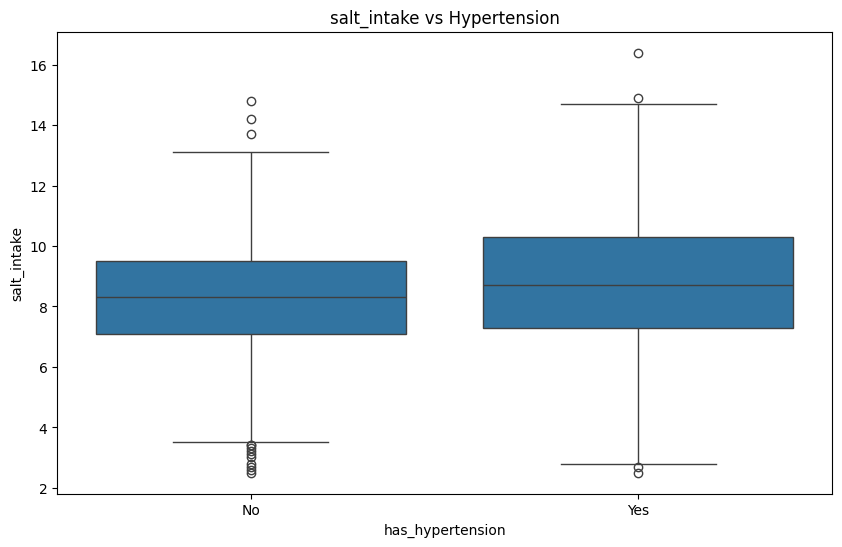

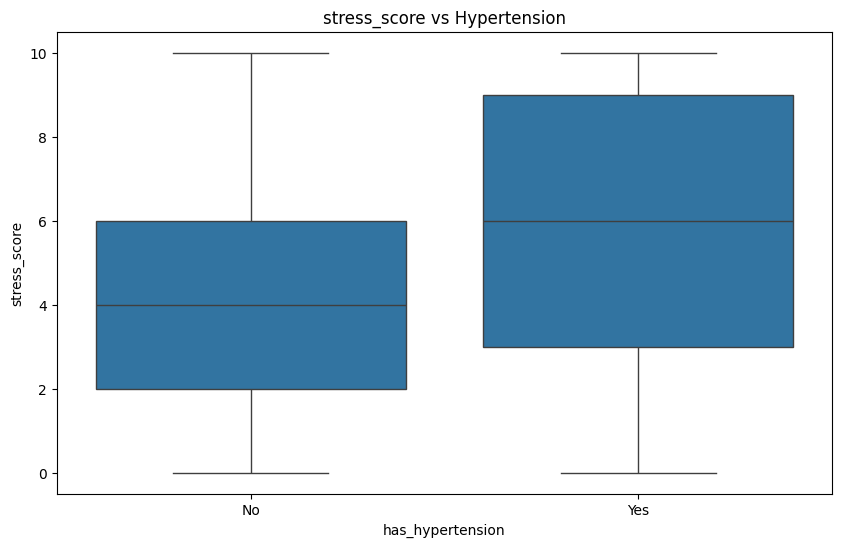

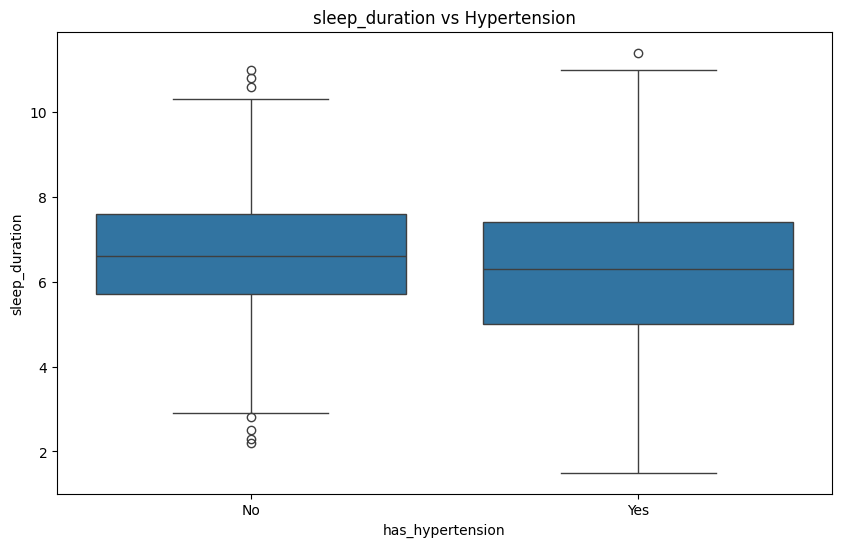

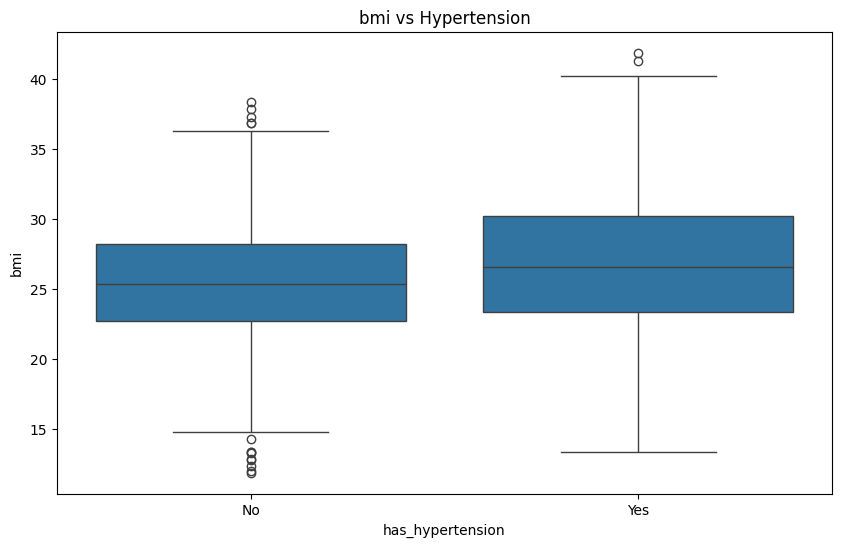

In [14]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x='has_hypertension', y=col, data=df)
    plt.title(f'{col} vs Hypertension')
    plt.show()

### Chi-Square Test (Categorical variables)

A χ² independence test was performed to assess the statistical relationship between hypertension (`hypertension`) and categorical variables. The test was applied to the following features:

- **BP History** — history of blood pressure
- **Medication** — type of prescribed medication (e.g., ACE Inhibitor, Beta Blocker, Diuretic, etc.)
- **Family History** — presence of hypertension in the family
- **Smoking Status** — smoking status

A contingency table was constructed for each feature and a p-value was calculated. If the p-value is < 0.05, the relationship is considered statistically significant.

In [15]:
from scipy import *
from scipy.stats import *

In [16]:
chi2_test_cols = ['bp_history', 'medication', 'family_history', 'smoking_status']
chi2_test_feature_names = ['BP History', 'Medication', 'Family history', 'Smoking']

In [17]:
def chi2_test(col, feature_name):
    # 1. Building the contingency table with real values.
    contingency_table = pd.crosstab(index=df['has_hypertension'], columns=df[col])
    observed_df = pd.DataFrame(contingency_table)
    # 2. Running Chi^2-test
    chi2, p_value, ddof, expected = chi2_contingency(observed_df)
    expected_df = pd.DataFrame(expected)
    expected_df.columns, expected_df.index = observed_df.columns, observed_df.index
    
    print(f'χ² stats = {chi2}; p value = {p_value:.2f}')
    print(f'OBSERVED for {feature_name}:')
    display(observed_df)
    print(f'EXPECTED for {feature_name}:')
    display(expected_df)
    print(f'{feature_name} {"AFFECTS" if p_value < .05 else "DOES NOT AFFECT"} hypertension.')
    print('_' * 35)

    return p_value < .05

In [18]:
significant_features = []
non_significant_features = []

for col, feature_name in zip(chi2_test_cols, chi2_test_feature_names):
    affect = chi2_test(col, feature_name)
    if affect:
        significant_features.append(feature_name)
    else:
        non_significant_features.append(feature_name)

χ² stats = 532.1576650956202; p value = 0.00
OBSERVED for BP History:


bp_history,Hypertension,Normal,Prehypertension
has_hypertension,,,
No,41,510,402
Yes,528,286,218


EXPECTED for BP History:


bp_history,Hypertension,Normal,Prehypertension
has_hypertension,,,
No,273.17733,382.160202,297.662469
Yes,295.82267,413.839798,322.337531


BP History AFFECTS hypertension.
___________________________________
χ² stats = 2.886830126575232; p value = 0.58
OBSERVED for Medication:


medication,ACE Inhibitor,Beta Blocker,Diuretic,No data,Other
has_hypertension,,,,,
No,162,198,106,387,100
Yes,161,214,139,412,106


EXPECTED for Medication:


medication,ACE Inhibitor,Beta Blocker,Diuretic,No data,Other
has_hypertension,,,,,
No,155.072544,197.801511,117.624685,383.600504,98.900756
Yes,167.927456,214.198489,127.375315,415.399496,107.099244


Medication DOES NOT AFFECT hypertension.
___________________________________
χ² stats = 156.8893789643941; p value = 0.00
OBSERVED for Family history:


family_history,No,Yes
has_hypertension,,
No,620,333
Yes,380,652


EXPECTED for Family history:


family_history,No,Yes
has_hypertension,,
No,480.100756,472.899244
Yes,519.899244,512.100756


Family history AFFECTS hypertension.
___________________________________
χ² stats = 124.38127752782385; p value = 0.00
OBSERVED for Smoking:


smoking_status,Non-Smoker,Smoker
has_hypertension,,
No,793,160
Yes,624,408


EXPECTED for Smoking:


smoking_status,Non-Smoker,Smoker
has_hypertension,,
No,680.302771,272.697229
Yes,736.697229,295.302771


Smoking AFFECTS hypertension.
___________________________________


In [19]:
print(f'SIGNIFICANT FEATURES: {str(significant_features)}')
print(f'NOT SIGNIFICANT FEATURES: {str(non_significant_features)}')

SIGNIFICANT FEATURES: ['BP History', 'Family history', 'Smoking']
NOT SIGNIFICANT FEATURES: ['Medication']


# Exploratory Data Analysis (EDA) Summary: Hypertension Risk Prediction Dataset

This summary presents key insights from the exploratory data analysis of the synthetic Hypertension Risk Prediction dataset.

---

## Numerical Features Analysis

1. **Salt Intake:**  
   There is a noticeable positive correlation with hypertension — higher daily salt intake is associated with increased risk of high blood pressure.

2. **Sleep Duration:**  
   Hypertension is more common among individuals sleeping between **4 to 7 hours** per night. The risk decreases for those sleeping more than 7 hours and increases for those sleeping less than 5 hours.

3. **BMI (Body Mass Index):**  
   Individuals with a **BMI > 30** (obesity) have a higher likelihood of developing hypertension, consistent with known medical findings.

---

## Categorical Features Analysis

1. **BP History (Blood Pressure History):**  
   A statistically significant association exists between past blood pressure status and current hypertension. Patients with a history of hypertension are more likely to currently have it, whereas those with prehypertension have a lower occurrence, possibly reflecting disease progression stages.

2. **Family History:**  
   Having a family history of hypertension significantly increases the likelihood of hypertension in the patient. This association is statistically significant.

3. **Smoking Status:**  
   Smokers are significantly more likely to have hypertension, confirmed by statistical testing.

4. **Medication:**  
   No statistically significant association was found between medication type and hypertension status. ACE inhibitors are prescribed roughly equally to patients with and without hypertension, while beta blockers and diuretics are more common among hypertensive patients.

---

## Summary of Statistical Tests

- **Statistically significant features associated with hypertension:**  
  `BP History`, `Family History`, `Smoking Status`.

- **No statistically significant association found for:**  
  `Medication`.

---

## Overall Conclusion

These findings align well with established medical knowledge on hypertension risk factors:

- High salt intake, insufficient sleep, and obesity increase the risk of hypertension.
- Genetic predisposition and smoking are important behavioral and biological risk factors.
- Medication type in this synthetic dataset does not directly indicate hypertension status, possibly due to dataset characteristics.

These insights provide a strong foundation for building and interpreting machine learning models and for further feature importance analysis.

---

# 2. Data Preprocessing
Before training the model, we performed several preprocessing steps to prepare the dataset.

2.1. Encoding Categorical Variables

    - Binary features were encoded as 0 and 1.

    - Multiclass features (if any) were one-hot encoded.

2.2. Feature Scaling

    - All numerical features were scaled using StandardScaler to normalize the distribution.

    - Scaling is essential for algorithms like logistic regression and improves convergence during model training.

2.3. Train-Test Split or Cross-Validation

    - Cross-validation is used with preprocessing inside a Pipeline to avoid data leakage.

In [20]:
df.nunique()

age                  67
salt_intake         121
stress_score         11
bp_history            3
sleep_duration       88
bmi                 236
medication            5
family_history        2
exercise_level        3
smoking_status        2
has_hypertension      2
dtype: int64

In [21]:
multiclass_features = ['bp_history', 'family_history', 'exercise_level', 'smoking_status']

for feature in multiclass_features:
    print(f'{feature}:\n{df[feature].unique()}')
    print('_'*10)

bp_history:
['Normal', 'Hypertension', 'Prehypertension']
Categories (3, object): ['Hypertension', 'Normal', 'Prehypertension']
__________
family_history:
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
__________
exercise_level:
['Low', 'Moderate', 'High']
Categories (3, object): ['High', 'Low', 'Moderate']
__________
smoking_status:
['Non-Smoker', 'Smoker']
Categories (2, object): ['Non-Smoker', 'Smoker']
__________


In [22]:
df['bp_history'] = df['bp_history'].map({
    'Normal': 0,
    'Hypertension': 1,
    'Prehypertension': 2
}) # OneHot is not important here, because this feature is ordered.
df['family_history'] = df['family_history'].map({
    'Yes': 1,
    'No': 0
})
df['exercise_level'] = df['exercise_level'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})
df['smoking_status'] = df['smoking_status'].map({
    'Smoker': 1,
    'Non-Smoker': 0
})

df.head()

,age,salt_intake,stress_score,bp_history,sleep_duration,bmi,medication,family_history,exercise_level,smoking_status,has_hypertension
0,69,8.0,9,0,6.4,25.8,No data,1,0,0,Yes
1,32,11.7,10,0,5.4,23.4,No data,0,0,0,No
2,78,9.5,3,0,7.1,18.7,No data,0,1,0,No
3,38,10.0,10,1,4.2,22.1,ACE Inhibitor,0,0,0,Yes
4,41,9.8,1,2,5.8,16.2,Other,0,1,0,No


In [23]:
# Target feature
df['has_hypertension'] = df['has_hypertension'].map({
    'Yes': 1,
    'No': 0
})
df.head()

,age,salt_intake,stress_score,bp_history,sleep_duration,bmi,medication,family_history,exercise_level,smoking_status,has_hypertension
0,69,8.0,9,0,6.4,25.8,No data,1,0,0,1
1,32,11.7,10,0,5.4,23.4,No data,0,0,0,0
2,78,9.5,3,0,7.1,18.7,No data,0,1,0,0
3,38,10.0,10,1,4.2,22.1,ACE Inhibitor,0,0,0,1
4,41,9.8,1,2,5.8,16.2,Other,0,1,0,0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
df[['salt_intake', 'sleep_duration', 'bmi']] = scaler.fit_transform(df[['salt_intake', 'sleep_duration', 'bmi']])
scaler

StandardScaler()

In [26]:
X = df.drop(columns=['medication', 'has_hypertension']) # Features
y = df['has_hypertension'] # Target

# 3. Modeling

In this section, we build and evaluate binary classification models to predict the presence of hypertension. Given the relatively small dataset, we opt for cross-validation to ensure robust and reliable performance estimates.

The modeling is structured as follows:

## 3.1) Logistic Regression

We begin with Logistic Regression as a baseline model. This choice is motivated by its simplicity, interpretability, and suitability for binary classification tasks. It helps to establish a performance benchmark and can provide insight into the relationship between features and the target variable through model coefficients.

### Advantages:
    - Easy to implement and interpret
    - Fast training, especially on small datasets
    - Works well when features have a linear relationship with the log-odds of the outcome

### Preprocessing:
    - Numerical features scaled using StandardScaler
    - Evaluation performed using 5-fold cross-validation

## 3.2) Random Forest
Next, we use a Random Forest, a powerful ensemble model that can capture complex nonlinear relationships and interactions between features. It often outperforms simpler models and is robust to outliers and irrelevant features.
## Advantages:
    Handles nonlinearities and feature interactions
    Less prone to overfitting compared to single decision trees
    Provides feature importance out-of-the-box
Note: Does not require feature scaling

# 3.3) XGBoost
Finally, we test XGBoost, a state-of-the-art gradient boosting algorithm. It tends to achieve very high performance, especially on structured/tabular data.
### Advantages:
    - Excellent predictive power
    - Built-in regularization to combat overfitting
    - Handles missing values internally

---

# 3.1 LOGISTIC REGRESSION

## Cross validation to split the data: 
- More stable estimation,
- Less risk of overfitting,
All data can be used: each observation is included in both the training and testing sets (in turn), and nothing is "lost.".
So now we're importing ```CROSS_VAL_SCORE``` and split features.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000))
])

logistic_model = LogisticRegression()
logistic_model.fit(X, y)

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

cv = 5 # Iterations

# Accuracy
accuracy_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f'Accuracy scores: {accuracy_scores}')
print(f'Mean accuracy: {accuracy_scores.mean():.4f}\n')

# F1-score
f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
print(f'F1 scores: {f1_scores}')
print(f'Mean F1 score: {f1_scores.mean():.4f}\n')

# ROC AUC
roc_auc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print(f'ROC AUC scores: {roc_auc_scores}')
print(f'Mean ROC AUC: {roc_auc_scores.mean():.4f}\n')

# Получаем предсказания для построения classification report
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

print("Classification Report:\n")
print(classification_report(y, y_pred))

Accuracy scores: [0.72292191 0.73803526 0.69521411 0.72544081 0.71536524]
Mean accuracy: 0.7194

F1 scores: [0.74178404 0.74384236 0.71258907 0.73218673 0.72371638]
Mean F1 score: 0.7308

ROC AUC scores: [0.81393338 0.82234935 0.78747522 0.79156712 0.81062878]
Mean ROC AUC: 0.8052

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       953
           1       0.73      0.73      0.73      1032

    accuracy                           0.72      1985
   macro avg       0.72      0.72      0.72      1985
weighted avg       0.72      0.72      0.72      1985



### **Logistic Regression** model with basic preprocessing and cross-validation shows a decent level of quality for the basic step.

- The model correctly classifies about 72% of patients, which is significantly better than random guessing (about 50% with an equal distribution of classes).The balance between precision and recall is good, and the model is fairly balanced — it doesn't sacrifice one metric in favor of another.A ROC AUC value of more than 0.8 indicates the model's good ability to distinguish classes, which is a strong sign of a qualitative prediction of hypertension risk.

- For class 0 (no hypertension), precision and recall are around 0.71, indicating that the model accurately identifies "healthy" patients. 

- For class 1 (hypertension), precision and recall are slightly higher, around 0.73, which is crucial for accurately identifying patients with hypertension.

# 3.2. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

# Cross validation to accuracy
accuracy_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
print(f'Random Forest Accuracy scores: {accuracy_scores}')
print(f'Mean accuracy: {np.mean(accuracy_scores):.4f}\n')

# ROC AUC
roc_auc_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print(f'Random Forest ROC AUC scores: {roc_auc_scores}')
print(f'Mean ROC AUC: {np.mean(roc_auc_scores):.4f}\n')

# Predictions for classification report
y_pred = cross_val_predict(rf_model, X, y, cv=cv)

print("Random Forest Classification Report:\n")
print(classification_report(y, y_pred))

Random Forest Accuracy scores: [0.9395466  0.95969773 0.96221662 0.94458438 0.96221662]
Mean accuracy: 0.9537

Random Forest ROC AUC scores: [0.98630816 0.99394864 0.99468815 0.9906852  0.99585727]
Mean ROC AUC: 0.9923

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       953
           1       0.96      0.95      0.96      1032

    accuracy                           0.95      1985
   macro avg       0.95      0.95      0.95      1985
weighted avg       0.95      0.95      0.95      1985



### **Random Forest shows better results!**
- Accuracy ~ 95% — the model classifies patients very accurately, significantly improving the result compared to logistic regression (~72%).

- ROC AUC ~ 0.99 — the class separation is almost perfect, indicating the model's high ability to distinguish between patients with and without hypertension.

- Precision and Recall for both classes are around 0.95-0.96, indicating that the model performs equally well in recognizing both patients with and without hypertension.

- F1-score of about 0.95–0.96 is a balanced classification quality that minimizes both type I and type II errors.

---
Now we can check for feature importances:

,Feature,Importance
3,bp_history,0.281408
0,age,0.127138
2,stress_score,0.106995
5,bmi,0.106174
1,salt_intake,0.105065
4,sleep_duration,0.097564
6,family_history,0.088357
8,smoking_status,0.072242
7,exercise_level,0.015056


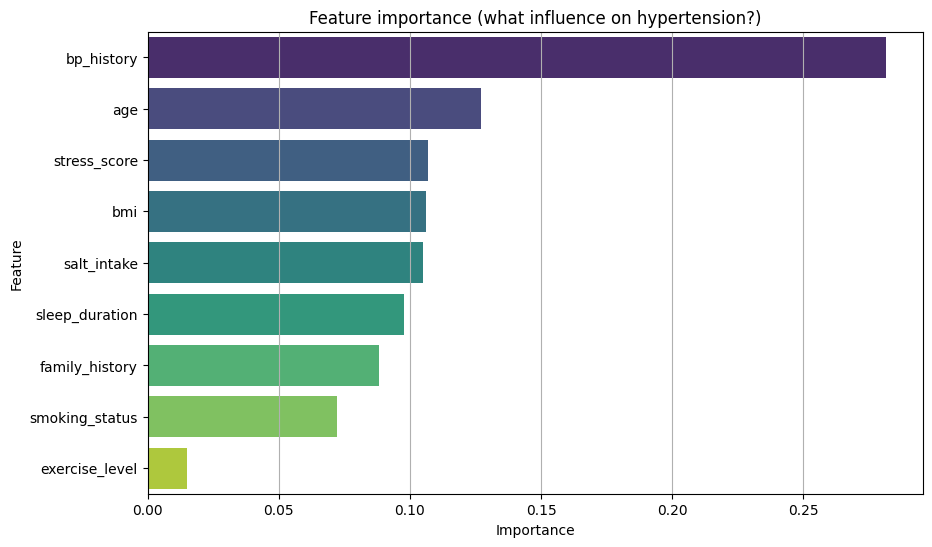

In [31]:
# Refitting model with whole data with no cross-validation.
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(feat_imp_df)
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature importance (what influence on hypertension?)')
plt.grid(axis='x')
plt.show()

## Conclusions on the importance of features (Random Forest)
- BP History (Blood Pressure History) is the most important feature (28%), which is logical, as previous blood pressure data is directly related to the current state of hypertension.

- Age (Age) is the second most important factor (13%), which confirms that the risk of hypertension increases with age.

- Stress Score (Stress Level), BMI (Body Mass Index), and Salt Intake (Salt Consumption) are approximately equally important (10-11%). These are key life factors that affect the risk of developing hypertension.

- Sleep Duration (Duration of Sleep) and Family History (Heredity) are moderately important (8-10%), indicating that sleep quality and genetics play a significant role.

- Smoking Status (Smoking) is slightly less important, but still has an impact (~7%).

- Exercise Level is the least significant indicator (~1.5%), which may indicate a weak correlation in this dataset or a lack of information on this parameter.

# 3.3. XGBoost, Gradient Boosting

In [32]:
import xgboost as xgb

In [33]:
# Convert categorial features to numeric (for XGboost)
X_encoded = pd.get_dummies(X, drop_first=True) 

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross validation to accuracy
accuracy_scores = cross_val_score(xgb_model, X_encoded, y, cv=cv, scoring='accuracy')
print(f'XGBoost Accuracy scores: {accuracy_scores}')
print(f'Mean accuracy: {np.mean(accuracy_scores):.4f}\n')

# ROC AUC
roc_auc_scores = cross_val_score(xgb_model, X_encoded, y, cv=cv, scoring='roc_auc')
print(f'XGBoost ROC AUC scores: {roc_auc_scores}')
print(f'Mean ROC AUC: {np.mean(roc_auc_scores):.4f}\n')

# Predictions for classification report
y_pred = cross_val_predict(xgb_model, X_encoded, y, cv=cv)

print("XGBoost Classification Report:\n")
print(classification_report(y, y_pred))

XGBoost Accuracy scores: [0.97481108 0.98740554 0.98236776 0.97732997 0.98236776]
Mean accuracy: 0.9809

XGBoost ROC AUC scores: [0.9977371  0.99956776 0.99936461 0.99743303 0.99842424]
Mean ROC AUC: 0.9985

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       953
           1       0.99      0.97      0.98      1032

    accuracy                           0.98      1985
   macro avg       0.98      0.98      0.98      1985
weighted avg       0.98      0.98      0.98      1985



## Results of the XGBoost model

- Accuracy ≈ 98.1% — a noticeable increase compared to Random Forest and logistic regression, the model almost perfectly classifies patients.

- ROC AUC ≈ 0.999 — almost perfect separation of classes, almost no errors.

- Precision and Recall for both classes ≈ 0.97–0.99 — the model is very well balanced and identifies both sick and healthy patients equally effectively.

- F1-score ≈ 0.98 is a high harmonic mean, which confirms the excellent quality of the predictions.

---

# 4. SHAP for:
- General influence of features (summary plot)
- Individual explanation (force plot for one patient)

---
First is to fit all models to make SHAP usable.

In [34]:
from sklearn.model_selection import train_test_split

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=.2, random_state=42)

xgb_model.fit(X_train_encoded, y_train)

display(xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
import shap

XGBoost - SHAP Summary Plot:


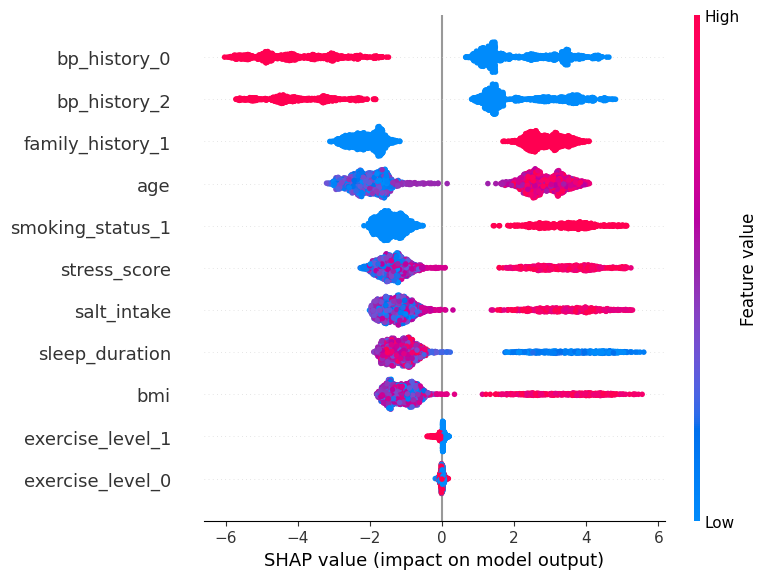

In [36]:
# XGBoost SHAP
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_encoded)
print("XGBoost - SHAP Summary Plot:")
shap.summary_plot(shap_values_xgb, X_encoded, feature_names=X_encoded.columns.tolist())

# 🩺 Feature-level interpretation

---

### 🩺 `bp_history_0`, `bp_history_2` - **the most influential features**

- Previous blood pressure issues are the strongest predictors

- Clinically intuitive and robust signal

### 👪 `family_history_1`

- Family history present = higher risk

- Absent = lower risk

- Genetic predisposition plays a meaningful role

### 🎂 `age`
- Older age means higher predicted risk

- Classic age-related hypertension risk captured well

### 🚬 `smoking_status_1`
- Smoking substantially increases risk

- Non-smoking reduces it

### 😖 `stress_score`
- Higher stress increases risk (and lower decreases)

### 🧂 `salt_intake`
- High salt intake is the reason of risk growth

### 😴  `sleep_duration`
- Short sleep => increased risk

- Longer sleep => reduced risk

### ⚖️ `bmi`
- Higher BMI makes a risk higher, lower more protective

### 🏃 `exercise_level_1`, `excercise_level_2`
- Physical activity may act indirectly (via BMI or stress)

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_encoded, y, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.9828715365239293


In [38]:
X.columns

Index(['age', 'salt_intake', 'stress_score', 'bp_history', 'sleep_duration',
       'bmi', 'family_history', 'exercise_level', 'smoking_status'],
      dtype='object')

# Project Report: Hypertension Prediction
## 1. Project Goal

Build and compare machine learning models to classify hypertension presence based on patient features. Evaluate model performance and analyze feature importance.

## 2. Models and Performance Metrics
| Metric   | Value  |
| -------- | ------ |
| Accuracy | \~0.72 |
| F1-score | \~0.73 |
| ROC AUC  | \~0.81 |

Baseline model with reasonable interpretability but lower performance compared to more complex models.

## 3. Random Forest
| Metric   | Value  |
| -------- | ------ |
| Accuracy | \~0.95 |
| F1-score | \~0.95 |
| ROC AUC  | \~0.99 |

Significant improvement in performance. Model effectively captures complex patterns. Feature bp_history was most important.

## 4. XGBoost
| Metric   | Value   |
| -------- | ------- |
| Accuracy | \~0.98  |
| F1-score | \~0.98  |
| ROC AUC  | \~0.998 |

Best-performing model overall, showing excellent generalization capability.

## 5. Feature Importance Analysis

- Both Random Forest and XGBoost identified bp_history (history of high blood pressure) as the most important feature.
- Followed by age, stress score, BMI, and salt intake.
- Smoking status and exercise level had lesser influence.

## 6. Conclusions and Recommendations

- Random Forest and XGBoost models significantly outperform Logistic Regression for hypertension classification.

- XGBoost is recommended as the primary model due to highest accuracy and robustness.

- Feature importance and SHAP analysis enhance model interpretability, valuable for clinical insights.

In [45]:
import joblib

path_to_save = os.path.join('..', 'src', 'models')

try:
    joblib.dump(logistic_model, f'{path_to_save}/hypertension_logistic_model.pkl')
    print('The model of logistic regression has been saved.')
    joblib.dump(rf_model, f'{path_to_save}/hypertension_rf.pkl')
    print('The model of Random Forest has been saved.')
    joblib.dump(xgb_model, f'{path_to_save}/hypertension_xgb.pkl')
    print('The model of XGBoost has been saved.')
    joblib.dump(scaler, '../src/models/num_scaler.pkl')
    print('Scaler has been saved.')
except Exception as e:
    print(f'Failed to save models:\n{e}')

The model of logistic regression has been saved.
The model of Random Forest has been saved.
The model of XGBoost has been saved.
Scaler has been saved.


---

Prediction (0=No, 1=Yes): 0
Hypertension probability: 0.380
